<a href="https://colab.research.google.com/github/Algi21/Unsupervised-Learning/blob/main/HW17_UNSUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
import pandas as pd

csv_url = "https://drive.google.com/uc?export=download&id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U"

# Mengatur opsi tampilan Pandas agar semua kolom terlihat
pd.set_option('display.max_columns', None) # Menampilkan semua kolom
pd.set_option('display.width', 1000)      # Mengatur lebar tampilan agar tidak terpotong

df = pd.read_csv(csv_url)
df.head()

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  FLIGHT_COUNT  BP_SUM  SUM_YR_1  SUM_YR_2  SEG_KM_SUM LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight
0      54993  11/2/2006        12/24/2008   Male         6            .       beijing           CN  31.0  3/31/2014           210  505308  239560.0  234188.0      580717        3/31/2014            1      3.483254            18              34      0.961639      619760               50
1      28065  2/19/2007          8/3/2007   Male         6          NaN       beijing           CN  42.0  3/31/2014           140  362480  171483.0  167434.0      293678        3/25/2014            7      5.194245            17              29      1.252314      415768               33
2      55106   2/1/2007         8/30/2007   Male         6            .       beijing           CN  40.0  3/31/2014           135  351159  163618.0  164982.0      283712        3/21/2014           11      5.298507            18              20      1.254676      406361               26
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles            CA           US  64.0  3/31/2014            23  337314  116350.0  125500.0      281336       12/26/2013           97     27.863636            73              11      1.090870      372204               12
4      39546  4/10/2009         4/15/2009   Male         6      guiyang       guizhou           CN  48.0  3/31/2014           152  273844  124560.0  130702.0      309928        3/27/2014            5      4.788079            47              27      0.970658      338813               39

#Exploratory Data Analysis

**Deskripsi Kolom**

* MEMBER_NO-b: ID Member
* FFP_DATE: Frequent Flyer Program Join Date
* FIRST_FLIGHT_DATE: Tanggal Penerbangan pertama
* GENDER: Jenis Kelamin
* FFP_TIER: Tier dari Frequent Flyer Program
* WORK_CITY: Kota Asal
* WORK_PROVINCE: Provinsi Asal
* WORK_COUNTRY: Negara Asal
* AGE: Umur Customer
* LOAD_TIME: Tanggal data diambil
* FLIGHT_COUNT: Jumlah penerbangan Customer
* BP_SUM: Rencana Perjalanan
* SUM_YR_1: Fare Revenue
* SUM_YR_2: Votes Prices
* SEG_KM_SUM: Total jarak(km) penerbangan yg sudah dilakukan
* LAST_FLIGHT_DATE: Tanggal penerbangan terakhir
* LAST_TO_END: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling
* AVG_INTERVAL: Rata-rata jarak waktu
* MAX_INTERVAL: Maksimal jarak waktu
* EXCHANGE_COUNT: Jumlah penukaran
avg_discount: Rata rata discount yang didapat customer
* Points_Sum: Jumlah poin yang didapat customer
* Point_NotFlight: point yang tidak digunakan oleh members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Berdasarkan info di atas, terdapat beberapa kolom dengan data null , dan untuk kolom FFP_DATE , FIRST_FLIGHT_DATE , LOAD_TIME , dan LAST_FLIGHT_DATE  perlu dianti ke numerik dengan mengubahnya ke date_time kemudian menghitung selisih jumlah hari dari tanggal saat ini agar memudahkan permodelan

## Handling Missing Value

Jumlah kolom yang memiliki nilai null yaitu sebanyak 7 kolom diantaranya yaitu WORK_PROVINCE , WORK_CITY , AGE , SUM_YR_1 , SUM_YR_2 , WORK_COUNTRY , dan GENDER.
Karena nilai null terbanyak sekitar 5.2%, maka untuk kolom kategorikal bisa diisi dengan nilai modus dan untuk kolom numerik dapat diisi dengan nilai median.

In [ ]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# Handling Missing Value kolom numerik
# Handling kolom AGE
df['AGE'].fillna(df['AGE'].median(), inplace=True)

# Handling kolom SUM_YR_1
df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(), inplace=True)

# Handling kolom SUM_YR 2
df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(), inplace=True)

# Handling Missing Value kolom kategorikal

# Handling kolom Gender
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

# Handling kolom WORK_CITY
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)

# Handling kolom WORK_PROVINCE
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)

# Handling kolom WORK_COUNTRY
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62988 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          62988 non-null  object 
 6   WORK_PROVINCE      62988 non-null  object 
 7   WORK_COUNTRY       62988 non-null  object 
 8   AGE                62988 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62988 non-null  float64
 13  SUM_YR_2           62988 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

nilai null sudah diatasi

## Handling Duplicate value

In [ ]:
# data duplikat
df.duplicated().sum()

np.int64(0)

tidak terdapat duplikasi pada data

## Deskripsi statistik

In [ ]:
# Pisahkan kolom numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Kecualikan kolom 'MEMBER_NO' dari list
if 'MEMBER_NO' in numeric_cols:
    numeric_cols.remove('MEMBER_NO')
if 'MEMBER_NO' in categorical_cols:
    categorical_cols.remove('MEMBER_NO')

# Hitung dan tampilkan
print(f"Jumlah kolom numerik (tanpa MEMBER_NO): {len(numeric_cols)}")
print("Kolom numerik:")
print(numeric_cols)

print(f"\nJumlah kolom kategorikal (tanpa MEMBER_NO): {len(categorical_cols)}")
print("Kolom kategorikal:")
print(categorical_cols)



Jumlah kolom numerik (tanpa MEMBER_NO): 14
Kolom numerik:
['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']

Jumlah kolom kategorikal (tanpa MEMBER_NO): 8
Kolom kategorikal:
['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']


In [ ]:
df[numeric_cols].describe()

FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM       SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  Point_NotFlight
count  62988.000000  62988.000000  62988.000000   62988.000000   62988.000000   62988.000000   62988.000000  62988.000000  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000     62988.000000
mean       4.102162     42.466502     11.839414   10925.081254    5333.022406    5597.823538   17123.878691    176.120102     67.749788    166.033895        0.319775      0.721558   12545.7771         2.728155
std        0.373856      9.853632     14.049471   16339.486151    8077.407958    8694.832417   20960.844623    183.822223     77.517866    123.397180        1.136004      0.185427   20507.8167         7.364164
min        4.000000      6.000000      2.000000       0.000000       0.000000       0.000000     368.000000      1.000000      0.000000      0.000000        0.000000      0.000000       0.0000         0.000000
25%        4.000000     35.000000      3.000000    2518.000000    1020.000000     785.000000    4747.000000     29.000000     23.370370     79.000000        0.000000      0.611997    2775.0000         0.000000
50%        4.000000     41.000000      7.000000    5700.000000    2800.000000    2773.000000    9994.000000    108.000000     44.666667    143.000000        0.000000      0.711856    6328.5000         0.000000
75%        4.000000     48.000000     15.000000   12831.000000    6524.250000    6826.250000   21271.250000    268.000000     82.000000    228.000000        0.000000      0.809476   14302.5000         1.000000
max        6.000000    110.000000    213.000000  505308.000000  239560.000000  234188.000000  580717.000000    731.000000    728.000000    728.000000       46.000000      1.500000  985572.0000       140.000000

dapat dilihat bahwa rata - rata usia berada pada 42 tahun. sebagian besar data seimbang namun terdapat ketimpangan pada  kolom FLIGHT_COUNT, BP_SUM, dan Points_Sum.

In [ ]:
df[categorical_cols].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE
count       62988             62988  62988      62988         62988        62988      62988            62988
unique       3068              3406      2       3234          1165          118          1              731
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong           CN  3/31/2014        3/31/2014
freq          184                96  48137      11655         20757        57774      62988              959

berdarkan gambaran deskripsi statistik terlihat bahwa gender didominasi oleh laki laki. sebagian besar data menunjukkan bahwa negara asal didominai oleh China.

## Univariate Analysis

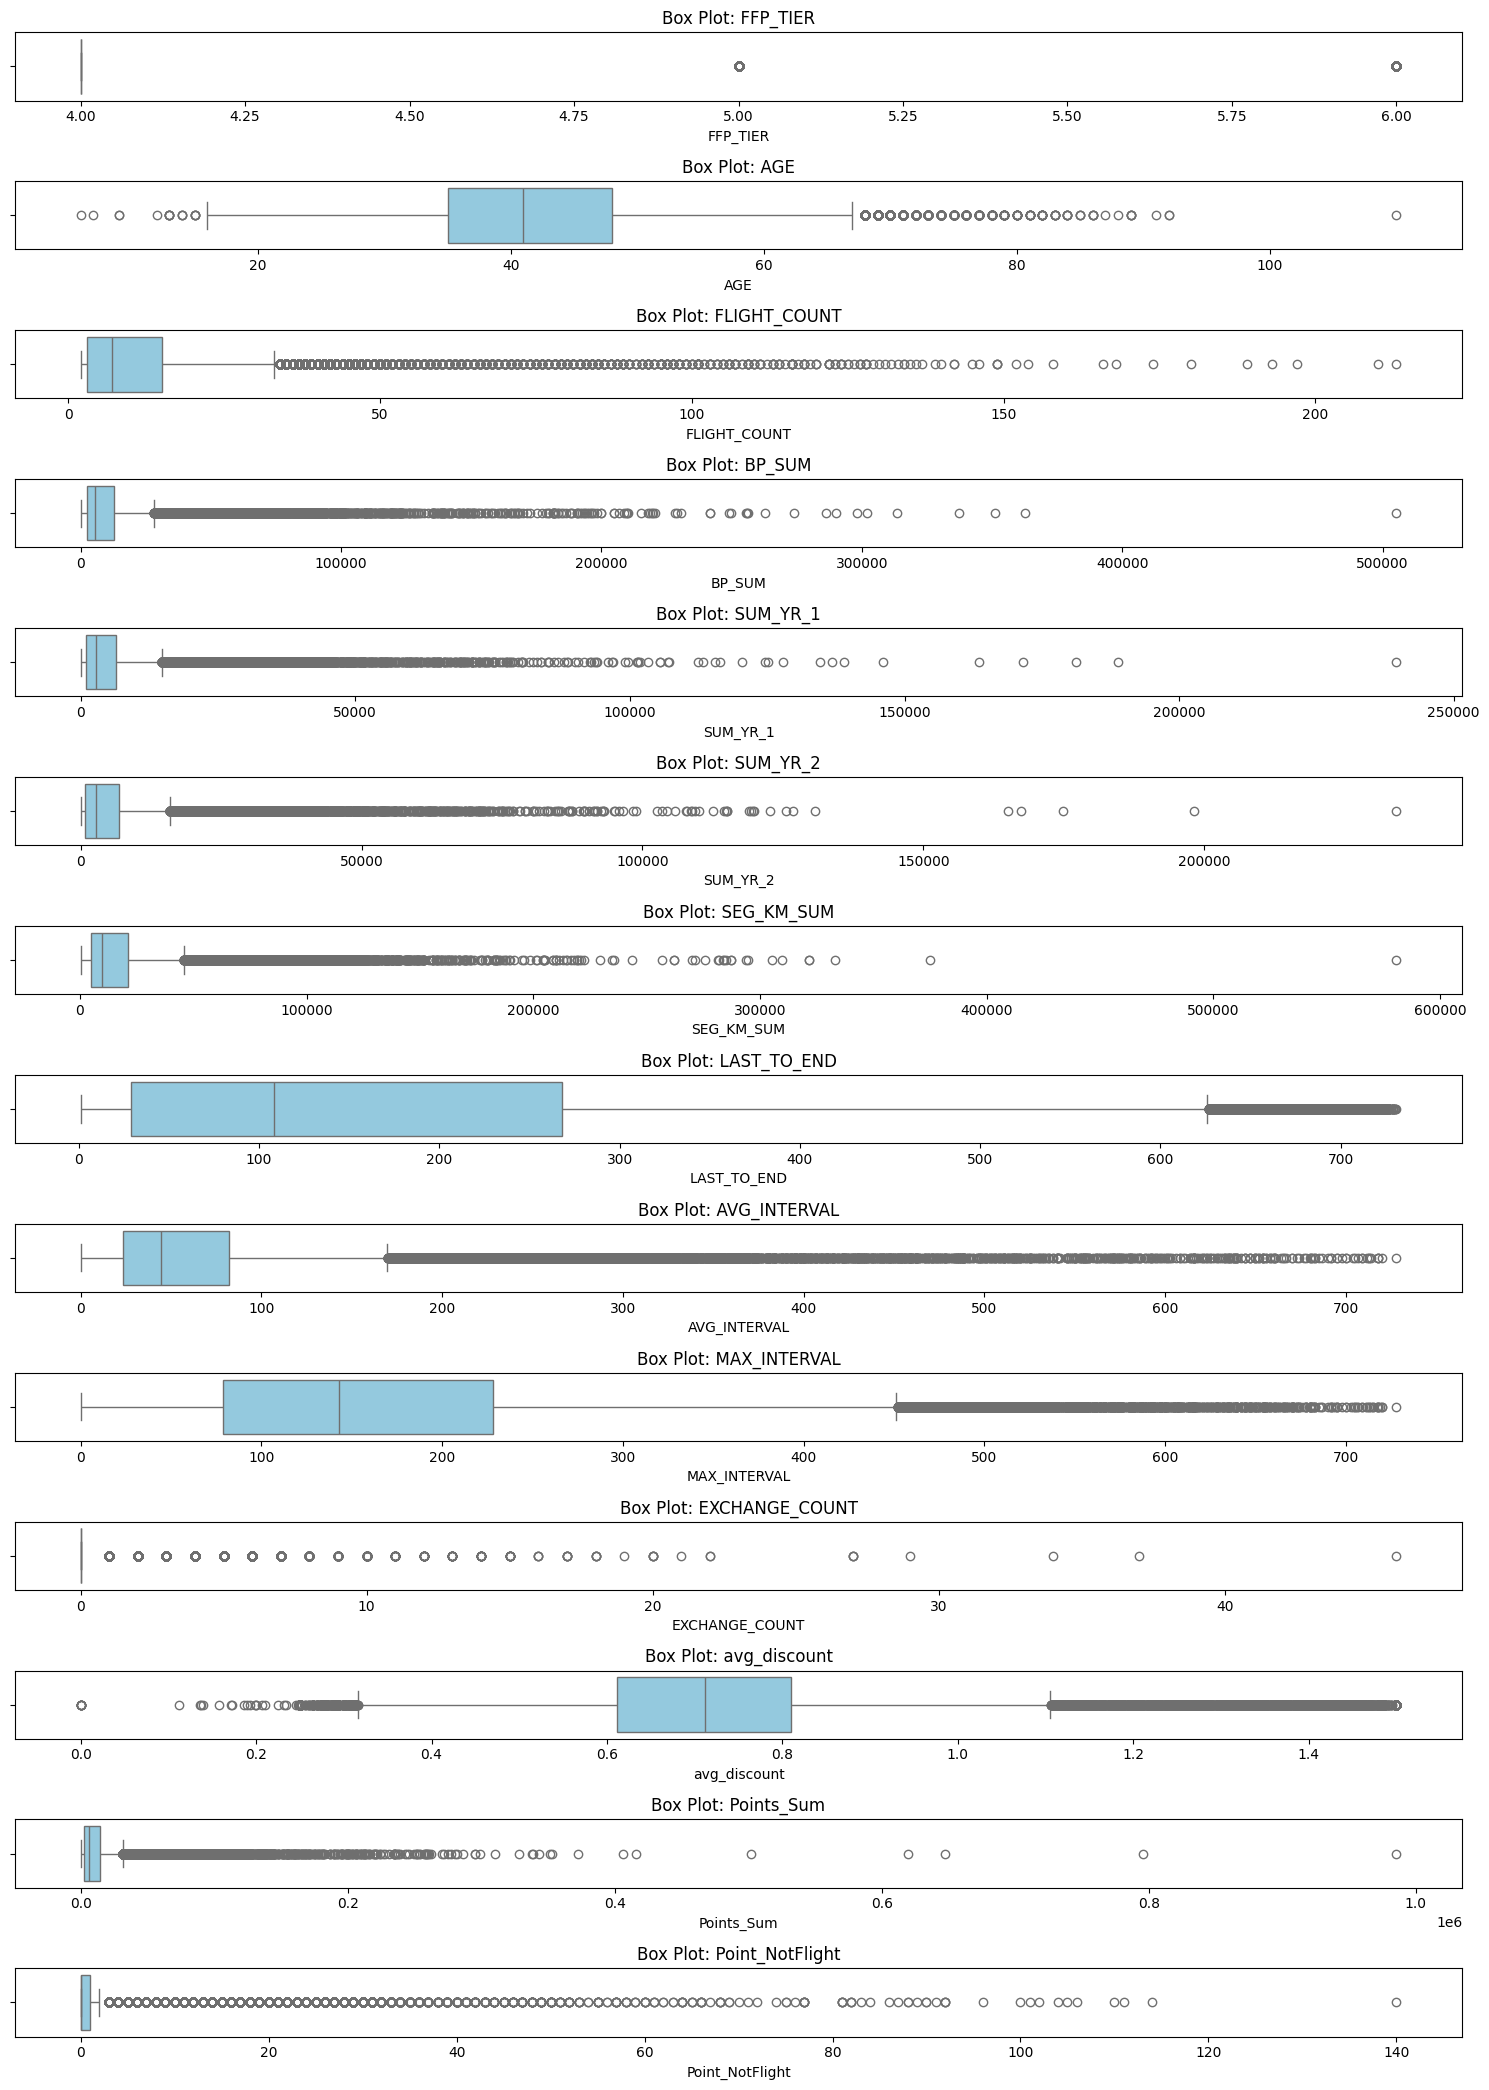

In [ ]:
# Buat box plot untuk tiap kolom numerik
plt.figure(figsize=(15, len(numeric_cols) * 1.5))  # Ukuran disesuaikan
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot: {col}')
    plt.tight_layout()

plt.show()

insight  : secara umum, seluruh box plot menunjukkan adanya outlier (titik titik di luar whisker), yang sebagian besar berada di sebelah kanan. Hal tersebut menandakan bahwa sebagian besar data berada di rentang rendah, tetapi terdapat nilai yang jauh lebih tinggi yang dianggap sebagai outlier.Namun, berbeda dengan kolom AGE yang menunjukkan nilai ekstrem terlampau rendah dan tinggi

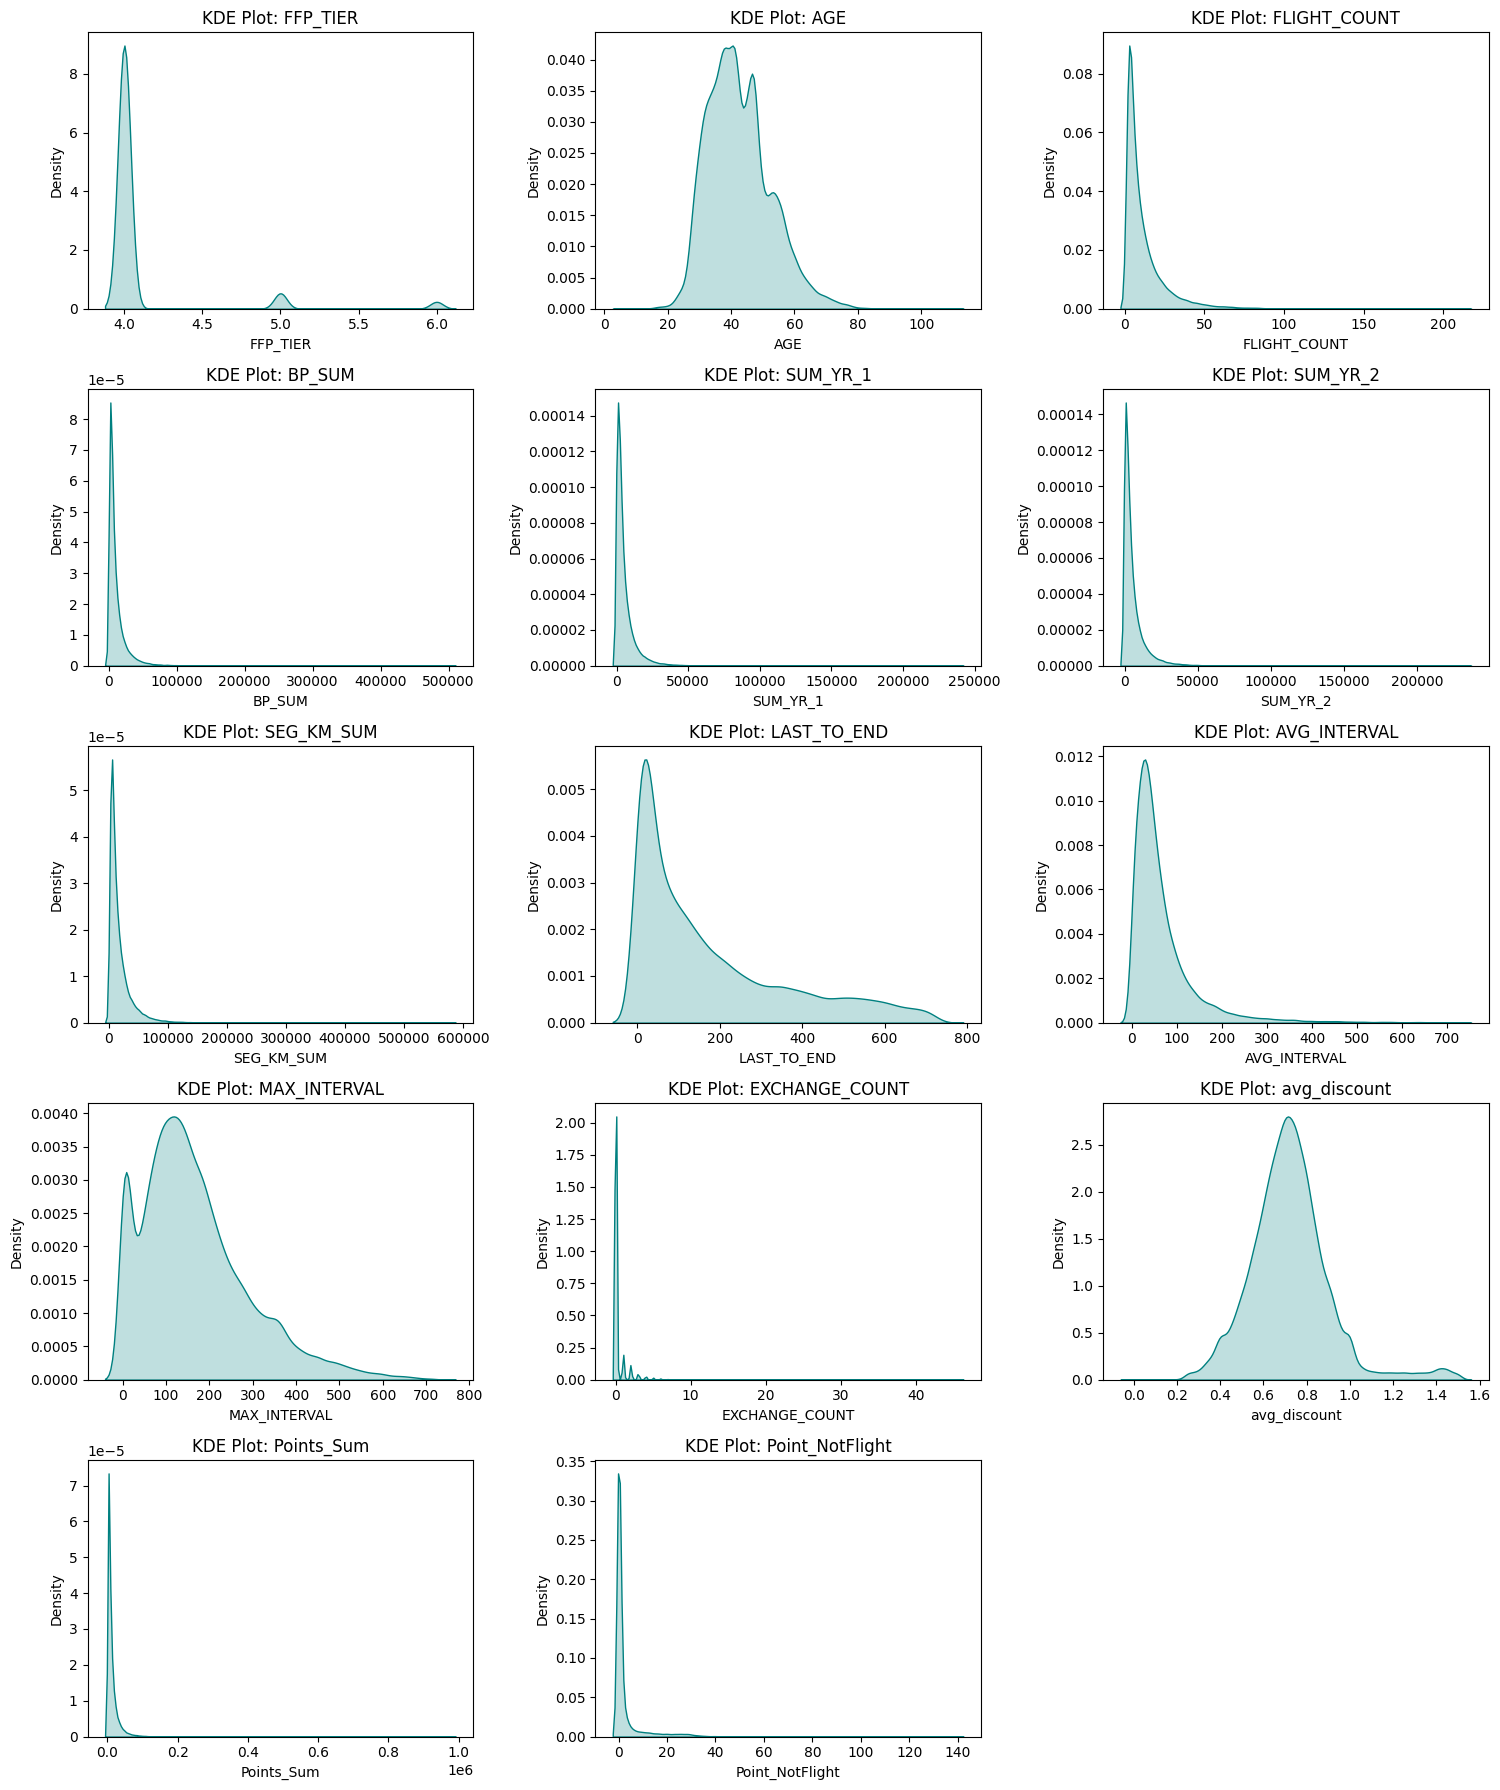

In [ ]:
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 18))  # Ukuran bisa disesuaikan
axes = axes.flatten()  # Untuk akses lebih mudah

# Plot KDE untuk tiap kolom
for i, col in enumerate(numeric_cols[:rows * cols]):  # Hanya ambil sebanyak 15 kolom
    sns.kdeplot(df[col].dropna(), ax=axes[i], shade=True, color='teal')
    axes[i].set_title(f"KDE Plot: {col}")

# Hapus subplot yang kosong (jika kolom < 15)
for j in range(len(numeric_cols), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Insight : secara umum, distribusi untuk tiap kolom berdistribusi positively-skewed

## Multivariate Analysis

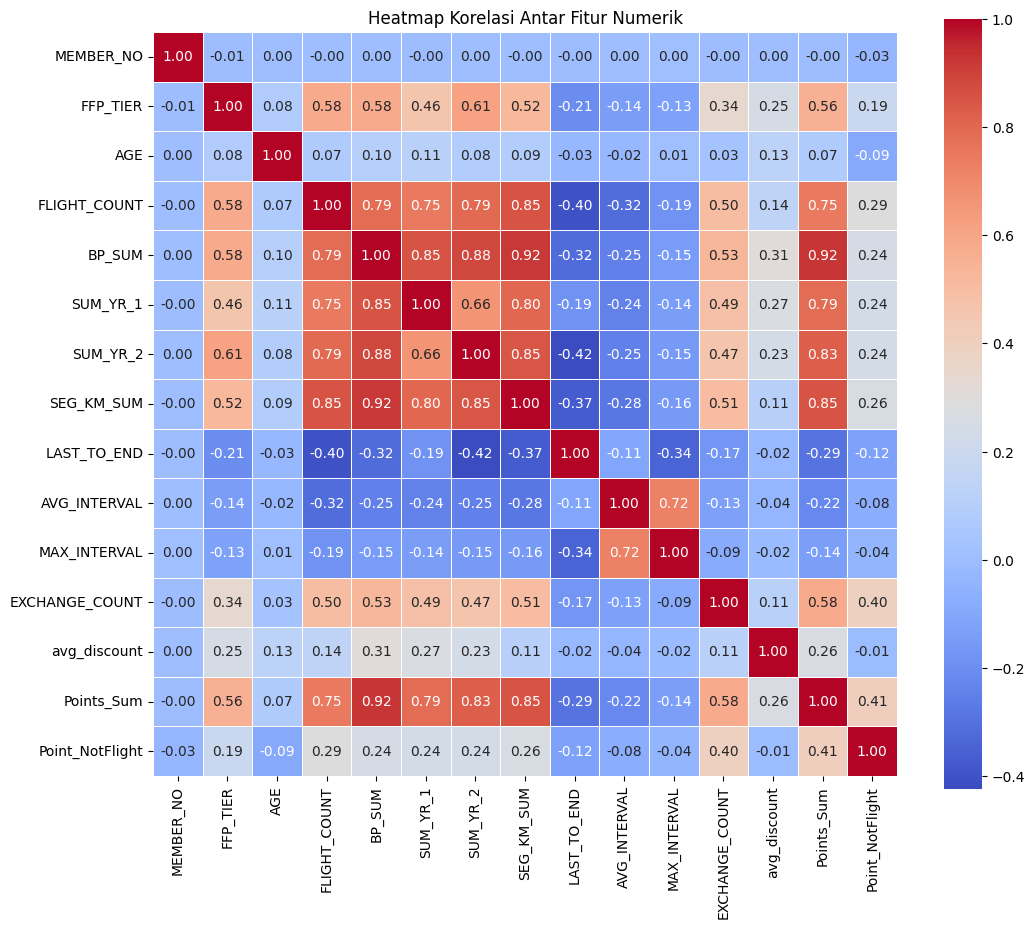

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numeric_cols = df.select_dtypes(include='number')

# Hitung korelasi
corr_matrix = numeric_cols.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

Fitur - fitur yang memiliki korealasi tinggi diantaanya yaitu :
* BP_SUM vs SUM_YR_1 → 0.92

* SEG_KM_SUM vs BP_SUM → 0.92

* SEG_KM_SUM vs SUM_YR_1 → 0.85

* Points_Sum vs FLIGHT_COUNT → 0.75

* Points_Sum vs BP_SUM  → 0.92

* Points_Sum vs SUM_YR_2 → 0.83

* Points_sum vs SUM_YR_1 → 0.75

* Points_Sum vs SEG_KM_SUM → 0.85

* MAX_INTERVAL vs AVG_INTERVAL → 0.72

fitur yang direkomendasikan untuk di drop diantaranya : BP_SUM , SEG_KM_SUM , Points_Sum , MAX_INTERVAL


#Feature Selection

In [ ]:
#Feature Selection
df_processed = df.copy()

#Drop kolom "BP_SUM , SEG_KM_SUM , Points_Sum , MAX_INTERVAL"
df_processed = df_processed.drop(columns=['BP_SUM', 'SEG_KM_SUM', 'Points_Sum', 'MAX_INTERVAL'])

Feature yang di drop : BP_SUM , SEG_KM_SUM , Points_Sum , MAX_INTERVAL

##Feature Engineering

In [ ]:
# Konversi tanggal
snapshot_date = pd.to_datetime("2014-03-31")
df_processed["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_processed["FIRST_FLIGHT_DATE"], errors='coerce')
df_processed["LAST_FLIGHT_DATE"] = pd.to_datetime(df_processed["LAST_FLIGHT_DATE"], errors='coerce')

# Feature Engineering
df_processed["Recency"] = (snapshot_date - df_processed["LAST_FLIGHT_DATE"]).dt.days
df_processed["Tenure"] = (snapshot_date - df_processed["FIRST_FLIGHT_DATE"]).dt.days
df_processed["Spending_per_Trip"] = df_processed["SUM_YR_1"] / df_processed["FLIGHT_COUNT"].replace(0, np.nan)

# Tampilkan beberapa baris untuk konfirmasi
df_processed[['Recency', 'Tenure', 'Spending_per_Trip']]

Recency  Tenure  Spending_per_Trip
0          0.0    1923        1140.761905
1          6.0    2432        1224.878571
2         10.0    2405        1211.985185
3         95.0    2046        5058.695652
4          4.0    1811         819.473684
...        ...     ...                ...
62983    295.0     299           0.000000
62984     87.0     198           0.000000
62985     28.0    2676           0.000000
62986    398.0     410           0.000000
62987    401.0     407        1400.000000

[62988 rows x 3 columns]

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  object        
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62988 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          62988 non-null  object        
 6   WORK_PROVINCE      62988 non-null  object        
 7   WORK_COUNTRY       62988 non-null  object        
 8   AGE                62988 non-null  float64       
 9   LOAD_TIME          62988 non-null  object        
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  SUM_YR_1           62988 non-null  float64       
 12  SUM_YR_2           62988 non-null  float64       
 13  LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 14  LAST_T

Feature Engineering yang dilakukan berdasarkan metode RFM (Recency-Frequency-Monetary) yang biasa dilakukan dalam segmentasi customer. Dimana feature yang ditambahkan ini dapat dimanfaatkan dalam Dimensionality
Reduction dengan menerapkan Principal
Component Analysis (PCA)<br>
**RFM Score : Recency-Frequency-Monetary**
*   Recency = Hari terakhir transaksi sampai tanggal referensi (3/31/2014)
*   Frequency = Jumlah perjalanan
*   Monetary = Total spending

<br>Feature yang ditambahkan:

* Recency (Days_Since_Last_Flight) = Selisih hari antara Last_Flight_Date dan 3/31/2014
* Tenure (Customer_Tenure) = Lama pelanggan aktif (dari First_Flight_Date ke 3/31/2014)
* Spending_per_Trip = Total_Spending / Frequency

In [ ]:
df_processed.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
SUM_YR_1               0
SUM_YR_2               0
LAST_FLIGHT_DATE     421
LAST_TO_END            0
AVG_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Point_NotFlight        0
Recency              421
Tenure                 0
Spending_per_Trip      0
dtype: int64

In [ ]:
# Drop missing
df_cleaned = df_processed.dropna(subset=["Recency", "LAST_FLIGHT_DATE"])
df_cleaned.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
SUM_YR_1             0
SUM_YR_2             0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Point_NotFlight      0
Recency              0
Tenure               0
Spending_per_Trip    0
dtype: int64

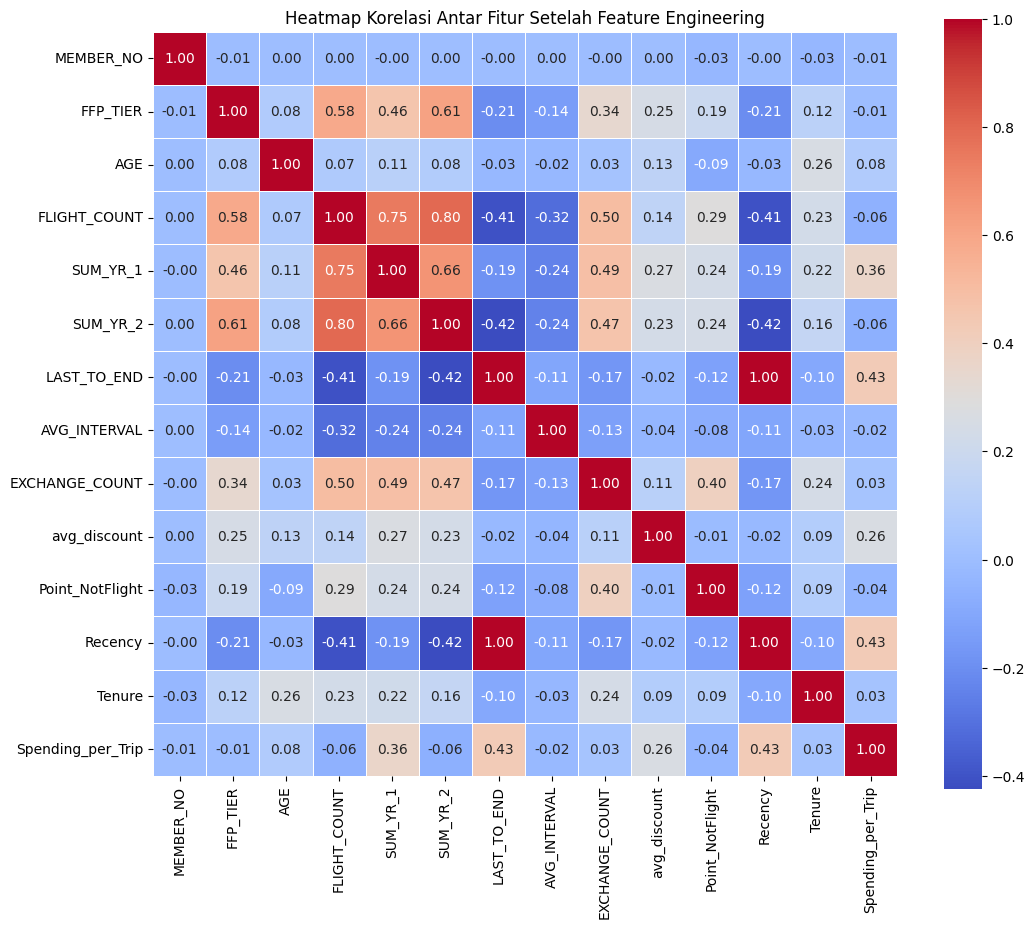

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numeric_cols = df_cleaned.select_dtypes(include='number')

# Hitung korelasi
corr_matrix = numeric_cols.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Setelah Feature Engineering")
plt.show()

Dari Heatmap Korelasi antar Fitur setelah proses Feature Engineering dapat terlihat bahwa feature "LAST_TO_END" dapat diwakili oleh feature "Recency". Sehingga feature "LAST_TO_END" sebaiknya di drop.

In [ ]:
#Drop kolom "LAST_TO_END"
df_cleaned = df_cleaned.drop(columns=['LAST_TO_END'])

# Modeling + Evaluasi

In [ ]:
# Membuat dataframe untuk clustering
data_clustering = df_cleaned[['MEMBER_NO', 'FFP_TIER', 'Recency', 'Tenure', 'Spending_per_Trip']]

Berdasarkan beberapa referensi penggunaan 3 fitur (Recency', 'Tenure', 'Spending_per_Trip) sudah cukup baik untuk analisis awal karna sudah dapat Merepresentasikan kegiatan pelanggan secara temporal (Recency & Tenure)
dan nilai ekonomis mereka (Spending_per_Trip)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data dengan MinMax Scaler
data_clustering_scaling = data_clustering[['Recency', 'Tenure', 'Spending_per_Trip']]
data_clustering_scaling = pd.DataFrame(scaler.fit_transform(data_clustering_scaling), columns=data_clustering_scaling.columns)
data_clustering[['Recency_scaled', 'Tenure_scaled', 'Spending_per_Trip_scaled']] =  data_clustering_scaling

# Hapus baris yang punya NaN di kolom hasil scaling
data_clustering = data_clustering.dropna(subset=['Recency_scaled', 'Tenure_scaled', 'Spending_per_Trip_scaled'])

# Tampilkan hasil
data_clustering

MEMBER_NO  FFP_TIER  Recency  Tenure  Spending_per_Trip  Recency_scaled  Tenure_scaled  Spending_per_Trip_scaled
0          54993         6      0.0    1923        1140.761905        0.000000       0.058756                  0.054674
1          28065         6      6.0    2432        1224.878571        0.008230       0.071493                  0.058706
2          55106         6     10.0    2405        1211.985185        0.013717       0.070817                  0.058088
3          21189         5     95.0    2046        5058.695652        0.130316       0.061834                  0.242453
4          39546         6      4.0    1811         819.473684        0.005487       0.055953                  0.039276
...          ...       ...      ...     ...                ...             ...            ...                       ...
62562      10952         4     93.0     265           0.000000        0.404664       0.018117                  0.000000
62563      18106         4     49.0    2074           0.000000        0.119342       0.015590                  0.000000
62564      43220         4    257.0     416         295.000000        0.038409       0.077599                  0.000000
62565      26769         4    190.0    2380           0.000000        0.545953       0.020895                  0.000000
62566      62646         4    237.0    2552           0.000000        0.550069       0.020820                  0.067099

[62148 rows x 8 columns]

Saat proses normalisasi data menghasilkan data Nan dikarenakan adanya data pembagian dengan nilai 0 , modelling yang digunakan k-means maka imputasi  data Nan adalah cara yang tepat

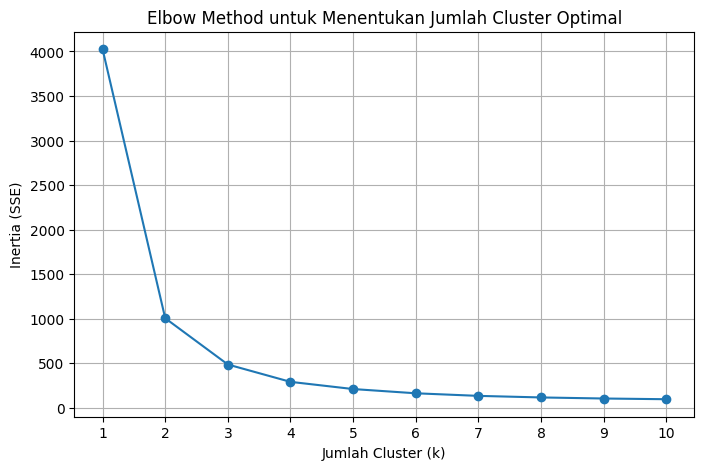

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih data hasil scaling
features_scaled = data_clustering[['Recency_scaled', 'Tenure_scaled', 'Spending_per_Trip_scaled']]

# Simpan inertia untuk setiap jumlah cluster
inertia = []
K_range = range(1, 11)  # Coba dari 1 sampai 10 cluster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(K_range)
plt.grid(True)
plt.show()

Berdasarkan elbow methode nilai k yang paling siku ada pada k = 2 dan setelahnya mengalami pelandaian

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menghasilkan data sintetis
X = data_clustering[['Recency_scaled', 'Tenure_scaled', 'Spending_per_Trip_scaled']]

silhouette_scores = list()

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Jumlah Klaster: {k}, Silhouette Score: {score:.4f}')

Jumlah Klaster: 2, Silhouette Score: 0.6856
Jumlah Klaster: 3, Silhouette Score: 0.6041
Jumlah Klaster: 4, Silhouette Score: 0.5598
Jumlah Klaster: 5, Silhouette Score: 0.5228
Jumlah Klaster: 6, Silhouette Score: 0.4905
Jumlah Klaster: 7, Silhouette Score: 0.4623
Jumlah Klaster: 8, Silhouette Score: 0.4379
Jumlah Klaster: 9, Silhouette Score: 0.4059
Jumlah Klaster: 10, Silhouette Score: 0.3797


berdasarkan evaluasi silhoutte score cluster = 2 memiliki nilai yang paling baik, tapi dengan pertimbangan berbagai referensi cluster = 2 kurang optimal untuk kepentingan representatif bisnis, maka modelling ini menggunakan cluster = 3 nilai silhoutte score paling baik ke-2 dan cukup baik untuk representatif bisnis

In [ ]:
from sklearn.cluster import KMeans

# Fitur yang digunakan (sudah diskalakan)
X = data_clustering[['Recency_scaled', 'Tenure_scaled', 'Spending_per_Trip_scaled']]

# Buat model K-Means dengan 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(X) cdcfr

# Lihat distribusi jumlah data per klaster
print(data_clustering['cluster'].value_counts().sort_index())

cluster
0    36624
1     9612
2    15912
Name: count, dtype: int64


Dominasi Cluster 0:
Cluster 0 memiliki jumlah anggota terbanyak, hampir dua kali lebih banyak dari cluster 2 dan hampir empat kali lebih banyak dari cluster 1.

Ini bisa berarti bahwa mayoritas data memiliki karakteristik yang serupa dan dikelompokkan ke dalam cluster 0.

In [ ]:
data_clustering['cluster'] = kmeans.labels_
data_clustering

MEMBER_NO  FFP_TIER  Recency  Tenure  Spending_per_Trip  Recency_scaled  Tenure_scaled  Spending_per_Trip_scaled  cluster
0          54993         6      0.0    1923        1140.761905        0.000000       0.058756                  0.054674        0
1          28065         6      6.0    2432        1224.878571        0.008230       0.071493                  0.058706        0
2          55106         6     10.0    2405        1211.985185        0.013717       0.070817                  0.058088        0
3          21189         5     95.0    2046        5058.695652        0.130316       0.061834                  0.242453        0
4          39546         6      4.0    1811         819.473684        0.005487       0.055953                  0.039276        0
...          ...       ...      ...     ...                ...             ...            ...                       ...      ...
62562      10952         4     93.0     265           0.000000        0.404664       0.018117                  0.000000        2
62563      18106         4     49.0    2074           0.000000        0.119342       0.015590                  0.000000        0
62564      43220         4    257.0     416         295.000000        0.038409       0.077599                  0.000000        0
62565      26769         4    190.0    2380           0.000000        0.545953       0.020895                  0.000000        1
62566      62646         4    237.0    2552           0.000000        0.550069       0.020820                  0.067099        1

[62148 rows x 9 columns]

Memasukan kolom cluster kedalam data clustering

In [ ]:
import plotly.graph_objects as go

# Membuat plot 3D dengan fitur yang telah diskalakan
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=data_clustering['Recency_scaled'],
            y=data_clustering['Tenure_scaled'],
            z=data_clustering['Spending_per_Trip_scaled'],
            mode='markers',
            marker=dict(
                size=5,
                color=data_clustering['cluster'],
                colorscale='Viridis',
                opacity=0.6,
                colorbar=dict(title='Cluster')
            ),
            hovertext=data_clustering['FFP_TIER'],
            hovertemplate=(
                'FFP Tier: %{hovertext}<br>' +
                'Recency: %{x}<br>' +
                'Tenure: %{y}<br>' +
                'Spending per Trip: %{z}'
            )
        )
    ]
)

# Layout update
fig.update_layout(
    width=800,
    height=700,
    title=dict(
        text='<b>Customer Segmentation (3D View)</b>',
        font=dict(size=20)
    ),
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Tenure',
        zaxis_title='Spending per Trip'
    )
)

# Tampilkan plot
fig.show()


* Sebagian besar pelanggan berkumpul di bagian bawah pada sumbu Spending per Trip, menunjukkan mayoritas pelanggan berbelanja sedikit per perjalanan.

* Pola sebaran pada sumbu Tenure dan Recency cukup membantu membedakan klaster.

* Ada beberapa outlier di Spending tinggi — bisa jadi pelanggan premium atau kasus khusus.

#Statistik Data Hasil Clustering

In [ ]:
data_clustering.groupby('cluster', as_index=False).agg(
    mean_Recency_scaled = ('Recency_scaled', 'mean'),
    mean_Tenure_scaled = ('Tenure_scaled', 'mean'),
    mean_Spending_per_Trip_scaled = ('Spending_per_Trip_scaled', 'mean'),

    median_Recency_scaled = ('Recency_scaled', 'median'),
    median_Tenure_scaled = ('Tenure_scaled', 'median'),
    median_Spending_per_Trip_scaled = ('Spending_per_Trip_scaled', 'median')
)

cluster  mean_Recency_scaled  mean_Tenure_scaled  mean_Spending_per_Trip_scaled  median_Recency_scaled  median_Tenure_scaled  median_Spending_per_Trip_scaled
0        0             0.069357            0.045177                       0.017112               0.050754              0.040188                         0.015150
1        1             0.729504            0.039987                       0.048443               0.720165              0.033031                         0.041448
2        2             0.340425            0.041007                       0.022919               0.323731              0.034833                         0.019936

#Deskripsi Kontekstual Masing-masing Cluster:

Cluster 0: Aktif Hemat
- Recency rendah (mean: 0.069) → Customer baru saja melakukan penerbangan.

- Tenure menengah (mean: 0.045) → Pelanggan sudah cukup lama menjadi customer, meskipun tidak yang paling lama.

- Spending per trip sangat rendah (mean: 0.017) → Mereka menghabiskan uang sangat sedikit per perjalanan.

- Kesimpulan:
Customer aktif (baru terbang) dan setia (tenure sedang), namun hemat saat terbang. Mungkin pengguna promo, kelas ekonomi, atau short-haul flight.


Cluster 1 : Big Spenders yang Tidak Aktif

- Recency tinggi (mean: 0.729) → Sudah lama tidak terbang.

- Tenure tinggi (mean: 0.039) → Sudah jadi pelanggan cukup lama.

- Spending per trip tinggi (mean: 0.048) → Pengeluaran per perjalanan tinggi.

- Kesimpulan:
Ini adalah customer lama yang loyal tapi tidak aktif lagi baru-baru ini, dan dulunya mereka adalah big spender (mungkin pengguna kelas bisnis/first-class atau frequent flyer internasional).


Cluster 2 : Customer Baru
- Recency menengah (mean: 0.34) → Terbang terakhir kali tidak terlalu lama atau terlalu baru.

- Tenure sangat rendah (mean: 0.041) → Pelanggan baru.

- Spending per trip rendah (mean: 0.023) → Pengeluaran per perjalanan cukup rendah.

- Kesimpulan:
Ini adalah pelanggan baru, sudah mulai melakukan perjalanan tapi belum terlalu aktif, dan pengeluarannya kecil. Bisa jadi mereka sedang mencoba layanan.

#Rekomendasi Bisnis

1. Untuk Cluster 0 (Aktif tapi Hemat)<br>
Strategi Monetisasi: Tawarkan layanan tambahan seperti bagasi ekstra, makanan, atau opsi naik kelas (upsell). Selain itu, perusahaan juga bisa menawarkan paket bundling atau program loyalitas berbasis aktivitas, seperti insentif poin untuk jumlah perjalanan tertentu, guna mendorong frekuensi terbang dan nilai transaksi per perjalanan mereka.

2. Untuk Cluster 1 (Big Spenders yang Tidak Aktif)<br>
Strategi Retensi: Kirimkan email promosi eksklusif, diskon untuk penerbangan jarak jauh, atau program loyalitas VIP. Tujuannya mengaktifkan kembali customer yang berpotensi memberi profit tinggi. Perusahaan dapat mengirimkan kampanye email atau SMS khusus berisi penawaran comeback, seperti diskon besar atau upgrade gratis. Selain itu, membentuk program loyalitas premium seperti keanggotaan VIP atau akses lounge dapat membangun kembali hubungan emosional dan memperkuat keterikatan mereka. Perusahaan juga disarankan untuk melakukan survei singkat untuk mengetahui alasan mengapa mereka berhenti terbang, sebagai dasar untuk memperbaiki layanan atau mengembangkan program retensi yang lebih tepat sasaran.

3. Untuk Cluster 2 (Customer Baru)<br>
Strategi Engagement: Kirim kampanye "Welcome Journey" untuk mengedukasi tentang keuntungan layanan, mileage reward, dan manfaat jadi member premium. Kemudian penawaran promosi khusus untuk pembelian kedua, misalnya potongan harga atau layanan bagasi gratis, juga bisa mendorong mereka untuk kembali terbang. Selain itu, pendekatan personalisasi seperti rekomendasi rute berdasarkan preferensi awal dapat menciptakan pengalaman positif yang memperkuat loyalitas sejak awal.